---

# k-nearest neighbors algorithm(k-nn, k 최근접 이웃)
2017.12.02 <br>
박지훈

---

k-nn

---

In [1]:
# import packagae
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# generage sample data
data_1 = np.random.normal(10, 5, [10, 3])
data_0 = np.random.normal(-10, 5, [10, 3])

data_1[:, 2] = 1 #라벨 1
data_0[:, 2] = 0 #라벨 0

dataset = np.vstack((data_1, data_0))

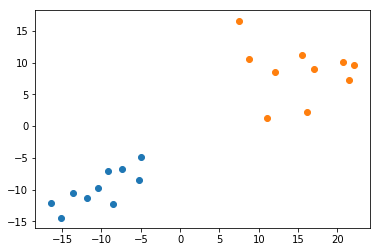

In [40]:
# visualization
plt.scatter(data_0[:, 0], data_0[:, 1])
plt.scatter(data_1[:, 0], data_1[:, 1])
plt.show()

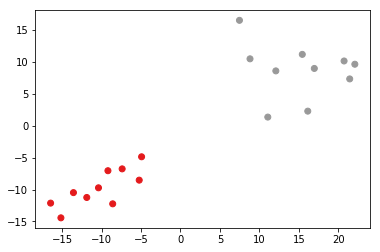

In [41]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap="Set1")
plt.show()

In [140]:
# k-nn 구현
def KNN(dataset, K, class_data):
    label = dataset[:, -1]
    row_len = dataset.shape[0]
    col_len = len(dataset[0])-1
    
    tile = np.tile(class_data, row_len).reshape(row_len, col_len)
    
    dist_1 = np.sum((dataset[:, :-1]-tile)**2, 1)
    dist_2 = (dataset[:, :-1]-class_data)**2

    vote = {1:np.count_nonzero(label[dist_1.argsort()][:K]), 0:K-np.count_nonzero(label[dist_1.argsort()][:K])}
    
    return tile, dist_1, dist_2, label, vote

In [143]:
tile, dist_1, dist_2, label, vote = KNN(dataset, 2, b)